In [1]:
%matplotlib inline  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, BSpline
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.animation as animation
import matplotlib
from IPython.display import HTML
import plotly.graph_objects as go  #plotly 4.0.0rc1
from plotly.subplots import make_subplots
from matplotlib import pyplot
import plotly.figure_factory as ff
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import itertools

from importlib import reload
import matplotlib.cm as cm # matplotlib's color map library
from matplotlib import rc
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [2]:
# Univariate gaussian system

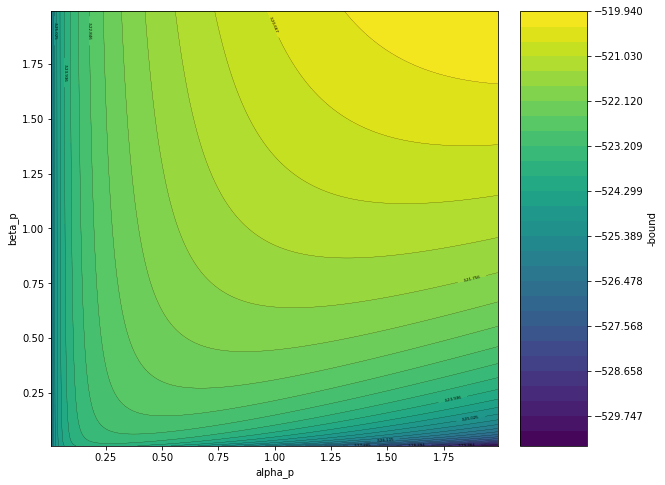

In [3]:
# alpha_p vs beta_p

data_contour = pd.read_csv('../../numerical_analysis/contour_gamma.csv')
data_contour = data_contour.loc[:, ~data_contour.columns.str.contains('^Unnamed')]
data_contour

levels = np.linspace(data_contour.to_numpy().min(),data_contour.to_numpy().max(), num=30)
linewidth_contour = 0.2

delta1 = 0.01
delta2 = 0.01
xlist = np.arange(0.01, 2, delta1)
ylist = np.arange(0.01, 2, delta2)
x, y = np.meshgrid(xlist, ylist)

fig, axes = plt.subplots(1,1,  figsize =(8,8))

cpf = axes.contourf(x, y, data_contour.values.tolist(), levels)
line_colors1 = ['black' for l in cpf.levels]
cp = axes.contour(x, y, data_contour.values.tolist(),
                       levels=levels, colors=line_colors1, linewidths=linewidth_contour)
axes.clabel(cp, cp.levels[::3], inline=True, fontsize=4)

axes.set_xlabel('alpha_p')
axes.set_ylabel('beta_p')

axins1 = inset_axes(axes,
                   width="15%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=axes.transAxes,
                   borderpad=0,
                   )
plt.colorbar(cpf,label='-bound', cax=axins1)  # draw colorbar


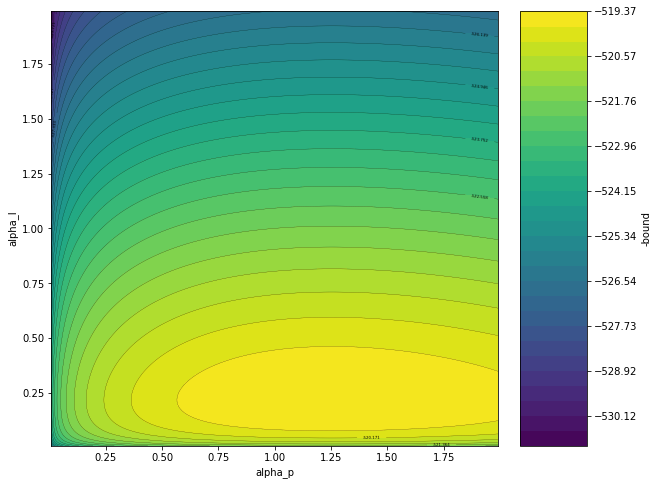

In [4]:
# alpha_l vs alpha_p

data_contour = pd.read_csv('../../numerical_analysis/contour_gamma_alphas.csv')
data_contour = data_contour.loc[:, ~data_contour.columns.str.contains('^Unnamed')]
data_contour

levels = np.linspace(data_contour.to_numpy().min(),data_contour.to_numpy().max(), num=30)
linewidth_contour = 0.2

delta1 = 0.01
delta2 = 0.01
xlist = np.arange(0.01, 2, delta1)
ylist = np.arange(0.01, 2, delta2)
x, y = np.meshgrid(xlist, ylist)

fig, axes = plt.subplots(1,1,  figsize =(8,8))

cpf = axes.contourf(x, y, data_contour.values.tolist(), levels)
line_colors1 = ['black' for l in cpf.levels]
cp = axes.contour(x, y, data_contour.values.tolist(),
                       levels=levels, colors=line_colors1, linewidths=linewidth_contour)
axes.clabel(cp, cp.levels[::3], inline=True, fontsize=4)


#line_colors1 = ['black']
axes.set_xlabel('alpha_p')
axes.set_ylabel('alpha_l')

axins1 = inset_axes(axes,
                   width="15%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=axes.transAxes,
                   borderpad=0,
                   )
plt.colorbar(cpf,label='-bound', cax=axins1)  # draw colorbar
#fig.savefig('/home/francesco/renyibounds/plot.pdf', bbox_inches='tight', pad_inches=0)

In [5]:
alphas = np.load('../../numerical_analysis/alphas.npy')
bound = np.load('../../numerical_analysis/bound.npy')
alphas_p = np.load('../../numerical_analysis/alphas_p.npy')
rb_value_p = np.load('../../numerical_analysis/rb_value_p.npy')


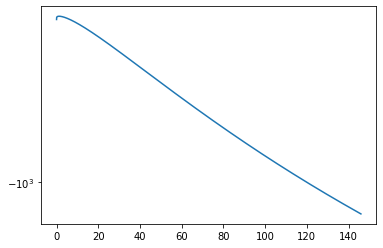

In [6]:
# KL bound as a function of alpha_p

fig, ax = plt.subplots()
ax.plot(alphas_p, rb_value_p)
ax.set_yscale('symlog')

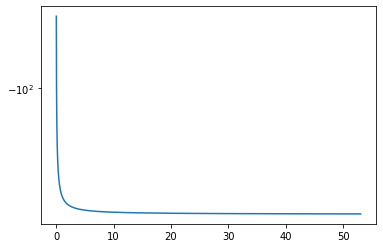

In [7]:
# Renyi bound as a function of alpha

fig, ax = plt.subplots()
ax.plot(alphas, bound)
ax.set_yscale('symlog')

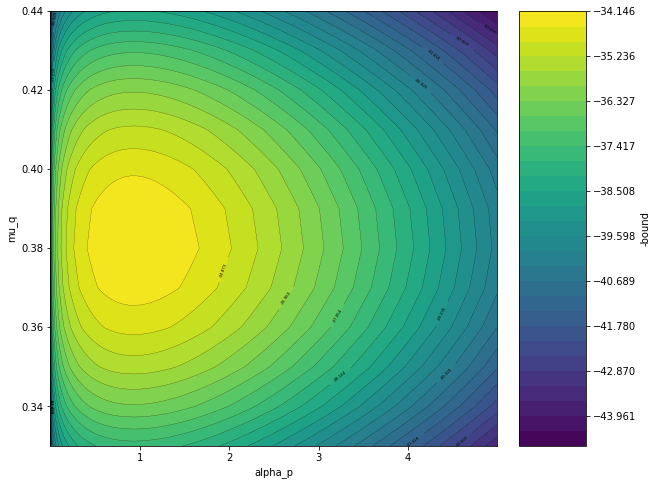

In [8]:
# mu_q vs alpha_p

data_contour = pd.read_csv('../../numerical_analysis/contour_alpha_p_muq.csv')
data_contour = data_contour.loc[:, ~data_contour.columns.str.contains('^Unnamed')]
levels = np.linspace(data_contour.to_numpy().min(),data_contour.to_numpy().max(), num=30)
linewidth_contour = 0.2

delta1 = 0.01
delta2 = 0.01
xlist = np.arange(0.001, 5, delta1)
ylist = np.arange(0.33, 0.45, delta2)
x, y = np.meshgrid(xlist, ylist)

fig, axes = plt.subplots(1,1,  figsize =(8,8))

cpf = axes.contourf(x, y, data_contour.values.tolist(), levels)
line_colors1 = ['black' for l in cpf.levels]
cp = axes.contour(x, y, data_contour.values.tolist(),
                       levels=levels, colors=line_colors1, linewidths=linewidth_contour)
axes.clabel(cp, cp.levels[::3], inline=True, fontsize=4)


#line_colors1 = ['black']
axes.set_xlabel('alpha_p')
axes.set_ylabel('mu_q')

axins1 = inset_axes(axes,
                   width="15%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=axes.transAxes,
                   borderpad=0,
                   )
plt.colorbar(cpf,label='-bound', cax=axins1)  # draw colorbar
#fig.savefig('/home/francesco/renyibounds/plot.pdf', bbox_inches='tight', pad_inches=0)

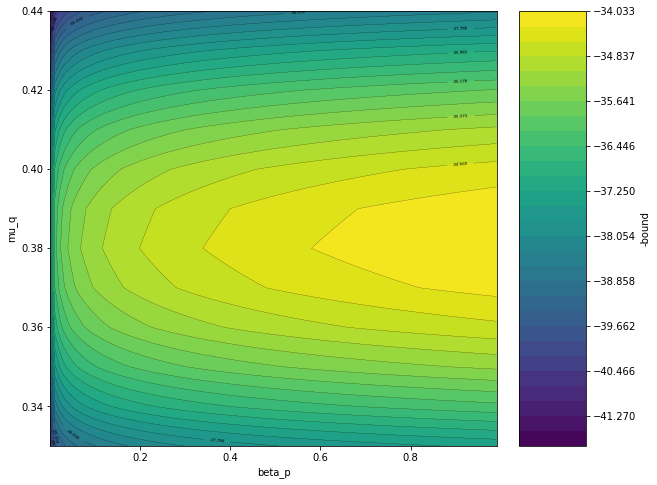

In [9]:
# mu_q vs beta_p

data_contour = pd.read_csv('../../numerical_analysis/contour_beta_p_muq.csv')
data_contour = data_contour.loc[:, ~data_contour.columns.str.contains('^Unnamed')]
levels = np.linspace(data_contour.to_numpy().min(),data_contour.to_numpy().max(), num=30)
linewidth_contour = 0.2

    
delta1 = 0.01
delta2 = 0.01
xlist = np.arange(0.001, 1, delta1)
ylist = np.arange(0.33, 0.45, delta2)
x, y = np.meshgrid(xlist, ylist)

fig, axes = plt.subplots(1,1,  figsize =(8,8))

cpf = axes.contourf(x, y, data_contour.values.tolist(), levels)
line_colors1 = ['black' for l in cpf.levels]
cp = axes.contour(x, y, data_contour.values.tolist(),
                       levels=levels, colors=line_colors1, linewidths=linewidth_contour)
axes.clabel(cp, cp.levels[::3], inline=True, fontsize=4)


#line_colors1 = ['black']
axes.set_xlabel('beta_p')
axes.set_ylabel('mu_q')

axins1 = inset_axes(axes,
                   width="15%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=axes.transAxes,
                   borderpad=0,
                   )
plt.colorbar(cpf,label='-bound', cax=axins1)  # draw colorbar
#fig.savefig('/home/francesco/renyibounds/plot.pdf', bbox_inches='tight', pad_inches=0)

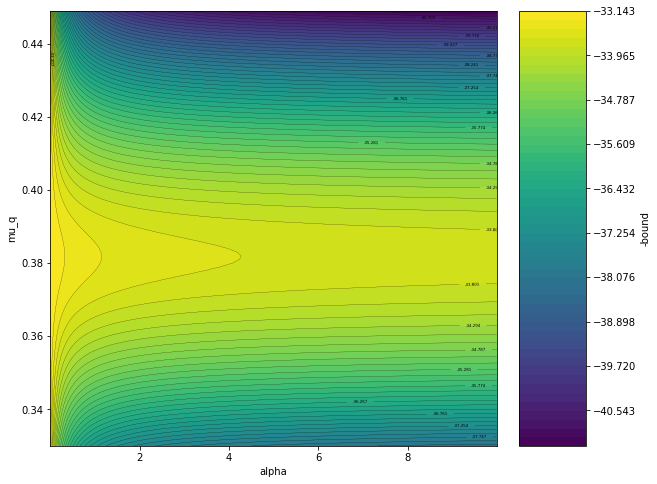

In [10]:
# mu_q vs alpha (Renyi bound)

data_contour = pd.read_csv('../../numerical_analysis/contour_alpha_muq.csv')
data_contour = data_contour.loc[:, ~data_contour.columns.str.contains('^Unnamed')]
levels = np.linspace(data_contour.to_numpy().min(),data_contour.to_numpy().max(), num=50)
linewidth_contour = 0.2

delta1 = 0.01
delta2 = 0.001
xlist = np.arange(0.001, 10, delta1)
ylist = np.arange(0.33, 0.45, delta2)
x, y = np.meshgrid(xlist, ylist)

fig, axes = plt.subplots(1,1,  figsize =(8,8))

cpf = axes.contourf(x, y, data_contour.values.tolist(), levels)
line_colors1 = ['black' for l in cpf.levels]
cp = axes.contour(x, y, data_contour.values.tolist(),
                       levels=levels, colors=line_colors1, linewidths=linewidth_contour)
axes.clabel(cp, cp.levels[::3], inline=True, fontsize=4)


#line_colors1 = ['black']
axes.set_xlabel('alpha')
axes.set_ylabel('mu_q')

axins1 = inset_axes(axes,
                   width="15%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=axes.transAxes,
                   borderpad=0,
                   )
plt.colorbar(cpf,label='-bound', cax=axins1)  # draw colorbar
#fig.savefig('/home/francesco/renyibounds/plot.pdf', bbox_inches='tight', pad_inches=0)



In [11]:
# Renyi multimodal bound

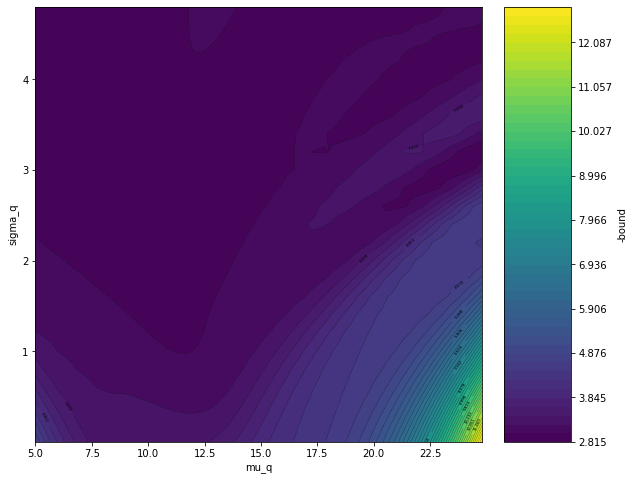

In [12]:
# alpha = 1e-6
data_contour = pd.read_csv('../../numerical_analysis/contour_1e-06.csv')
data_contour = data_contour.loc[:, ~data_contour.columns.str.contains('^Unnamed')]

levels = np.linspace(data_contour.to_numpy().min(),data_contour.to_numpy().max(), num=50)
linewidth_contour = 0.2

delta1 = 0.2
delta2 = 0.2
xlist = np.arange(5, 25, delta1)
ylist = np.arange(0.001, 5, delta2)
x, y = np.meshgrid(xlist, ylist)

fig, axes = plt.subplots(1,1,  figsize =(8,8))

cpf = axes.contourf(x, y, data_contour.values.tolist(), levels)
line_colors1 = ['black' for l in cpf.levels]
cp = axes.contour(x, y, data_contour.values.tolist(),
                       levels=levels, colors=line_colors1, linewidths=linewidth_contour)
axes.clabel(cp, cp.levels[::3], inline=True, fontsize=4)

axes.set_xlabel('mu_q')
axes.set_ylabel('sigma_q')

axins1 = inset_axes(axes,
                   width="15%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=axes.transAxes,
                   borderpad=0,
                   )
plt.colorbar(cpf,label='-bound', cax=axins1)  # draw colorbar


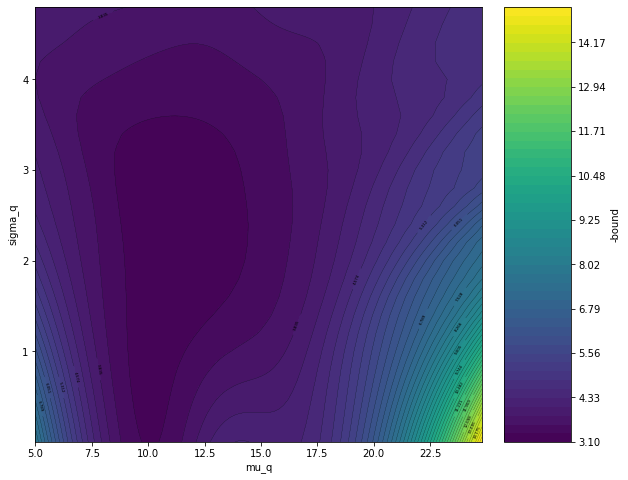

In [13]:
# alpha = 0.5

data_contour = pd.read_csv('../../numerical_analysis/contour_0.5.csv')
data_contour = data_contour.loc[:, ~data_contour.columns.str.contains('^Unnamed')]

levels = np.linspace(data_contour.to_numpy().min(),data_contour.to_numpy().max(), num=50)
linewidth_contour = 0.2

delta1 = 0.2
delta2 = 0.2
xlist = np.arange(5, 25, delta1)
ylist = np.arange(0.001, 5, delta2)
x, y = np.meshgrid(xlist, ylist)

fig, axes = plt.subplots(1,1,  figsize =(8,8))

cpf = axes.contourf(x, y, data_contour.values.tolist(), levels)
line_colors1 = ['black' for l in cpf.levels]
cp = axes.contour(x, y, data_contour.values.tolist(),
                       levels=levels, colors=line_colors1, linewidths=linewidth_contour)
axes.clabel(cp, cp.levels[::3], inline=True, fontsize=4)

axes.set_xlabel('mu_q')
axes.set_ylabel('sigma_q')

axins1 = inset_axes(axes,
                   width="15%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=axes.transAxes,
                   borderpad=0,
                   )
plt.colorbar(cpf,label='-bound', cax=axins1)  # draw colorbar


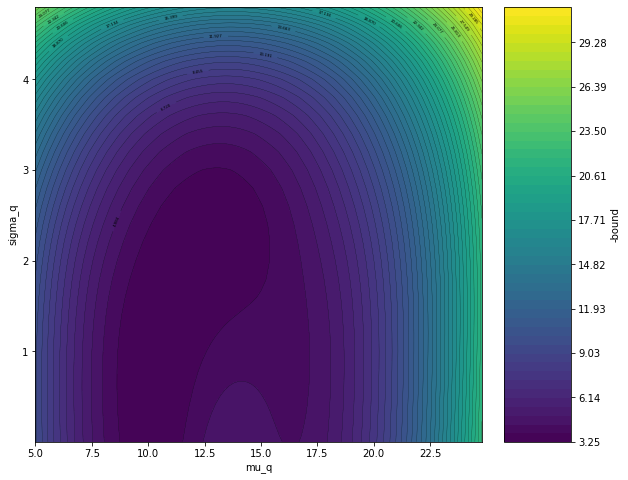

In [14]:
# alpha = 0.99

data_contour = pd.read_csv('../../numerical_analysis/contour_0.99.csv')
data_contour = data_contour.loc[:, ~data_contour.columns.str.contains('^Unnamed')]

levels = np.linspace(data_contour.to_numpy().min(),data_contour.to_numpy().max(), num=50)
linewidth_contour = 0.2

delta1 = 0.2
delta2 = 0.2
xlist = np.arange(5, 25, delta1)
ylist = np.arange(0.001, 5, delta2)
x, y = np.meshgrid(xlist, ylist)

fig, axes = plt.subplots(1,1,  figsize =(8,8))

cpf = axes.contourf(x, y, data_contour.values.tolist(), levels)
line_colors1 = ['black' for l in cpf.levels]
cp = axes.contour(x, y, data_contour.values.tolist(),
                       levels=levels, colors=line_colors1, linewidths=linewidth_contour)
axes.clabel(cp, cp.levels[::3], inline=True, fontsize=4)

axes.set_xlabel('mu_q')
axes.set_ylabel('sigma_q')

axins1 = inset_axes(axes,
                   width="15%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=axes.transAxes,
                   borderpad=0,
                   )
plt.colorbar(cpf,label='-bound', cax=axins1)  # draw colorbar


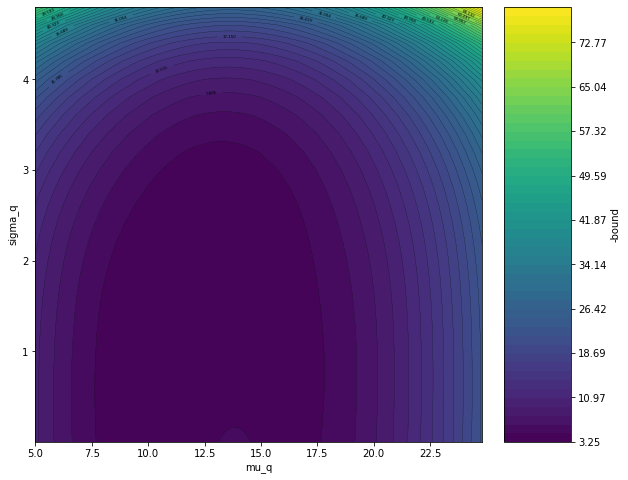

In [15]:
# alpha = 1.01

data_contour = pd.read_csv('../../numerical_analysis/contour_1.01.csv')
data_contour = data_contour.loc[:, ~data_contour.columns.str.contains('^Unnamed')]
levels = np.linspace(data_contour.to_numpy().min(),data_contour.to_numpy().max(), num=50)
linewidth_contour = 0.2

delta1 = 0.2
delta2 = 0.2
xlist = np.arange(5, 25, delta1)
ylist = np.arange(0.001, 5, delta2)
x, y = np.meshgrid(xlist, ylist)

fig, axes = plt.subplots(1,1,  figsize =(8,8))

cpf = axes.contourf(x, y, data_contour.values.tolist(), levels)
line_colors1 = ['black' for l in cpf.levels]
cp = axes.contour(x, y, data_contour.values.tolist(),
                       levels=levels, colors=line_colors1, linewidths=linewidth_contour)
axes.clabel(cp, cp.levels[::3], inline=True, fontsize=4)

axes.set_xlabel('mu_q')
axes.set_ylabel('sigma_q')

axins1 = inset_axes(axes,
                   width="15%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=axes.transAxes,
                   borderpad=0,
                   )
plt.colorbar(cpf,label='-bound', cax=axins1)  # draw colorbar


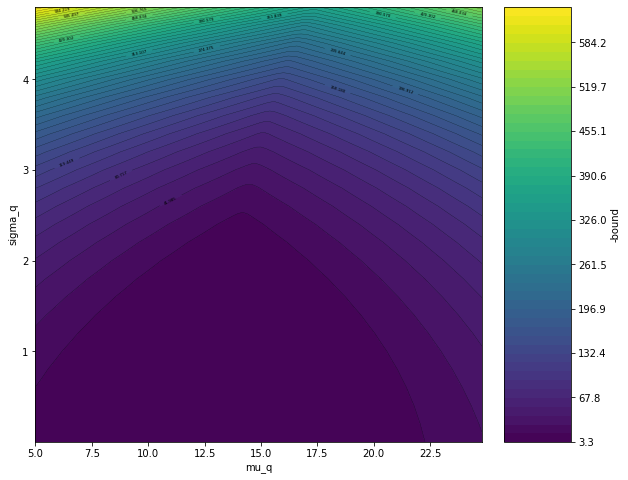

In [16]:
# alpha = 2


data_contour = pd.read_csv('../../numerical_analysis/contour_2.csv')
data_contour = data_contour.loc[:, ~data_contour.columns.str.contains('^Unnamed')]
levels = np.linspace(data_contour.to_numpy().min(),data_contour.to_numpy().max(), num=50)
linewidth_contour = 0.2

delta1 = 0.2
delta2 = 0.2
xlist = np.arange(5, 25, delta1)
ylist = np.arange(0.001, 5, delta2)
x, y = np.meshgrid(xlist, ylist)

fig, axes = plt.subplots(1,1,  figsize =(8,8))

cpf = axes.contourf(x, y, data_contour.values.tolist(), levels)
line_colors1 = ['black' for l in cpf.levels]
cp = axes.contour(x, y, data_contour.values.tolist(),
                       levels=levels, colors=line_colors1, linewidths=linewidth_contour)
axes.clabel(cp, cp.levels[::3], inline=True, fontsize=4)

axes.set_xlabel('mu_q')
axes.set_ylabel('sigma_q')

axins1 = inset_axes(axes,
                   width="15%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=axes.transAxes,
                   borderpad=0,
                   )
plt.colorbar(cpf,label='-bound', cax=axins1)  # draw colorbar


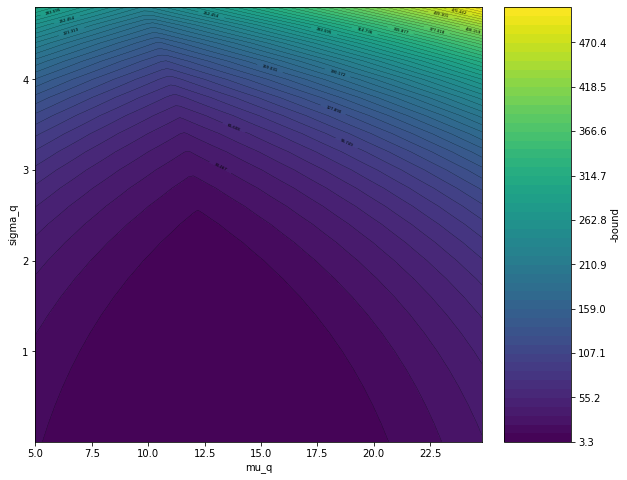

In [17]:
# alpha = 1e6

data_contour = pd.read_csv('../../numerical_analysis/contour_1000000.0.csv')
data_contour = data_contour.loc[:, ~data_contour.columns.str.contains('^Unnamed')]
levels = np.linspace(data_contour.to_numpy().min(),data_contour.to_numpy().max(), num=50)
linewidth_contour = 0.2

delta1 = 0.2
delta2 = 0.2
xlist = np.arange(5, 25, delta1)
ylist = np.arange(0.001, 5, delta2)
x, y = np.meshgrid(xlist, ylist)

fig, axes = plt.subplots(1,1,  figsize =(8,8))

cpf = axes.contourf(x, y, data_contour.values.tolist(), levels)
line_colors1 = ['black' for l in cpf.levels]
cp = axes.contour(x, y, data_contour.values.tolist(),
                       levels=levels, colors=line_colors1, linewidths=linewidth_contour)
axes.clabel(cp, cp.levels[::3], inline=True, fontsize=4)

axes.set_xlabel('mu_q')
axes.set_ylabel('sigma_q')

axins1 = inset_axes(axes,
                   width="15%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=axes.transAxes,
                   borderpad=0,
                   )
plt.colorbar(cpf,label='-bound', cax=axins1)  # draw colorbar
